In [13]:
import numpy as np
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Flatten
from keras.utils import to_categorical
from keras.layers import Activation
from keras.layers import Dropout

from mpl_toolkits.mplot3d import Axes3D

In [2]:
A01T = h5py.File('/Users/nathanpilbrough/Downloads/project_datasets_2/A01T_slice.mat','r')
data = np.copy(A01T['image'])
labels = np.copy(A01T['type'])
labels = labels[0,0:data.shape[0]:1]
labels = np.asarray(labels, dtype=np.int32)

In [3]:
#check the data dimensionality
print data.shape
print labels.shape
data = np.swapaxes(data, 1,2)
data = data[:,:,:22]
print data.shape
print labels.shape
print len(np.argwhere(labels == 769))

(288, 25, 1000)
(288,)
(288, 1000, 22)
(288,)
72


In [4]:
# Check min and max values
print np.min(data)
print np.max(data)
print len(np.argwhere(np.isnan(data)))
print np.argwhere(np.isnan(data))

nan
nan
48
[[56  0 17]
 [56  1 17]
 [56  2 17]
 [56  3 17]
 [56  4 17]
 [56  5 17]
 [56  6 17]
 [56  7 17]
 [56  8 17]
 [56  9 17]
 [56 10 17]
 [56 11 17]
 [56 12 17]
 [56 13 17]
 [56 14 17]
 [56 15 17]
 [56 16 17]
 [56 17 17]
 [56 18 17]
 [56 19 17]
 [56 20 17]
 [56 21 17]
 [56 22 17]
 [56 23 17]
 [56 24 17]
 [56 25 17]
 [56 26 17]
 [56 27 17]
 [56 28 17]
 [56 29 17]
 [56 30 17]
 [56 31 17]
 [56 32 17]
 [56 33 17]
 [56 34 17]
 [56 35 17]
 [56 36 17]
 [56 37 17]
 [56 38 17]
 [56 39 17]
 [56 40 17]
 [56 41 17]
 [56 42 17]
 [56 43 17]
 [56 44 17]
 [56 45 17]
 [56 60 17]
 [56 61 17]]


In [5]:
data[np.isnan(data)] = 92.5
print np.argwhere(np.isnan(data))

[]


ZeroDivisionError: integer division or modulo by zero

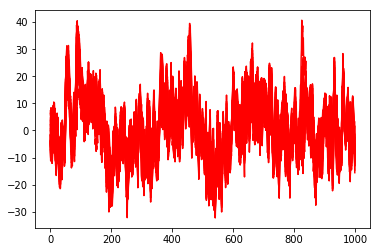

In [6]:
for i in range(data.shape[0]):
    plt.plot(data[i,:,:21], color='red')
    plt.plot(data[i,:,22:], color='blue')
    plt.plot([250,250],[-50,150], color = 'black')
    plt.axis((-50,1050,-70,180))
    plt.ylabel('Voltage')
    plt.xlabel('Time Step')
    plt.savefig('/Users/nathanpilbrough/Downloads/nndl_images/dataset_vis/%04d.png' % i, dpi = 300)
    plt.cla()
    plt.clf()

92.5


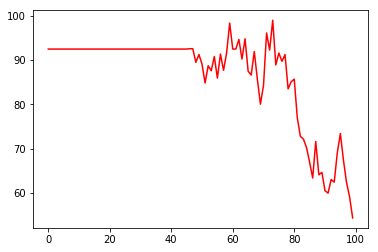

In [7]:
print data[56,0,17]
plt.plot(data[56,:100,17], color='red')

In [8]:
#one-hot-encode the data for use with categorical_crossentropy
labels_cata = labels - 769
print labels_cata
labels_cata = to_categorical(labels_cata, num_classes=4)
print labels_cata

[3 2 1 0 0 1 2 3 1 2 0 0 0 3 1 1 0 0 2 0 1 3 3 2 0 3 3 1 3 3 1 0 1 2 2 2 3
 2 0 3 1 2 1 2 3 1 2 0 0 0 3 1 0 2 0 2 1 3 0 2 2 0 2 1 3 3 3 2 0 3 1 3 1 0
 2 1 0 2 2 0 2 3 3 1 0 1 3 1 3 2 1 1 1 2 3 0 1 3 0 2 2 3 0 0 2 1 3 3 3 1 0
 2 1 3 0 3 2 1 3 3 0 1 1 2 3 1 0 0 3 1 0 2 1 1 2 0 3 2 2 2 2 0 1 0 1 0 0 2
 2 1 2 3 0 3 0 0 1 3 2 1 3 2 3 2 3 1 1 3 0 1 1 1 2 3 0 3 0 2 0 3 0 2 0 1 2
 2 3 0 1 3 1 2 2 0 3 1 3 0 0 2 2 1 3 1 1 0 1 3 3 1 1 1 1 3 3 2 3 0 1 2 1 0
 3 0 3 0 0 0 0 2 2 3 1 2 2 2 3 2 0 2 0 3 1 3 3 2 3 3 2 1 3 2 0 1 1 1 2 1 3
 2 3 1 2 0 3 0 2 3 0 2 0 1 1 0 3 0 3 2 2 0 2 1 1 0 2 0 1 0]
[[ 0.  0.  0.  1.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 ..., 
 [ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]]


In [121]:
# Vanilla LSTM implementation
model = Sequential()
model.add(LSTM(5, input_shape=(1000, 22), ))
model.add(Dense(4, activation= 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(data, labels_cata, nb_epoch=10, batch_size=8, verbose=1, validation_split=0.15)
print(model.summary())

Train on 244 samples, validate on 44 samples
Epoch 1/10
244/244 [==============================] - 27s 112ms/step - loss: 1.4608 - acc: 0.2336 - val_loss: 1.4703 - val_acc: 0.1818
Epoch 2/10
244/244 [==============================] - 25s 102ms/step - loss: 1.4356 - acc: 0.2418 - val_loss: 1.4735 - val_acc: 0.1818
Epoch 3/10
244/244 [==============================] - 25s 101ms/step - loss: 1.4158 - acc: 0.2869 - val_loss: 1.4877 - val_acc: 0.1818
Epoch 4/10
244/244 [==============================] - 24s 99ms/step - loss: 1.3936 - acc: 0.3156 - val_loss: 1.4845 - val_acc: 0.2045
Epoch 5/10
244/244 [==============================] - 25s 101ms/step - loss: 1.3820 - acc: 0.3238 - val_loss: 1.4789 - val_acc: 0.1818
Epoch 6/10
244/244 [==============================] - 25s 101ms/step - loss: 1.3672 - acc: 0.3320 - val_loss: 1.4778 - val_acc: 0.1591
Epoch 7/10
244/244 [==============================] - 25s 101ms/step - loss: 1.3576 - acc: 0.3402 - val_loss: 1.4632 - val_acc: 0.1591
Epoch 8/10


In [11]:
# Stacked LSTM model
model = Sequential()
model.add(LSTM(10, input_shape=(1000,22),return_sequences=True))
model.add(LSTM(10, return_sequences=True))
model.add(LSTM(10))
model.add(Dense(4))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(data, labels_cata, nb_epoch=3, batch_size=10, verbose=1, validation_split=0.1)
print(model.summary())

Train on 259 samples, validate on 29 samples
Epoch 1/3
 80/259 [========>.....................] - ETA: 56s - loss: 1.3897 - acc: 0.2000 

KeyboardInterrupt: 

In [20]:
# Model from thesis paper
model = Sequential()
model.add(LSTM(128, input_shape=(1000,22)))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(data, labels_cata, nb_epoch=10, batch_size=100, verbose=1, validation_split=0.1)
print(model.summary())

Train on 259 samples, validate on 29 samples
Epoch 1/10
259/259 [==============================] - 10s 37ms/step - loss: 1.6558 - acc: 0.2239 - val_loss: 1.4185 - val_acc: 0.2759
Epoch 2/10
259/259 [==============================] - 5s 21ms/step - loss: 1.4676 - acc: 0.2664 - val_loss: 1.3901 - val_acc: 0.3448
Epoch 3/10
259/259 [==============================] - 6s 22ms/step - loss: 1.3602 - acc: 0.3629 - val_loss: 1.4031 - val_acc: 0.3103
Epoch 4/10
259/259 [==============================] - 6s 23ms/step - loss: 1.2712 - acc: 0.3745 - val_loss: 1.4219 - val_acc: 0.2759
Epoch 5/10
259/259 [==============================] - 6s 22ms/step - loss: 1.1893 - acc: 0.4826 - val_loss: 1.4225 - val_acc: 0.2759
Epoch 6/10
259/259 [==============================] - 6s 24ms/step - loss: 1.1744 - acc: 0.4595 - val_loss: 1.4472 - val_acc: 0.2759
Epoch 7/10
259/259 [==============================] - 6s 21ms/step - loss: 1.1123 - acc: 0.5560 - val_loss: 1.4774 - val_acc: 0.2069
Epoch 8/10
259/259 [===

KeyboardInterrupt: 

In [99]:
# Reference model
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 16
timesteps = 8
num_classes = 10

# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Generate dummy training data
x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

# Generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

model.fit(x_train, y_train,
          batch_size=64, epochs=10,
          validation_data=(x_val, y_val))

Train on 1000 samples, validate on 100 samples
Epoch 1/10
1000/1000 [==============================] - 10s 10ms/step - loss: 11.6029 - acc: 0.1000 - val_loss: 11.4855 - val_acc: 0.0600
Epoch 2/10
1000/1000 [==============================] - 0s 373us/step - loss: 11.6008 - acc: 0.0960 - val_loss: 11.4851 - val_acc: 0.0900
Epoch 3/10
1000/1000 [==============================] - 0s 372us/step - loss: 11.6005 - acc: 0.0900 - val_loss: 11.4878 - val_acc: 0.0900
Epoch 4/10
1000/1000 [==============================] - 0s 401us/step - loss: 11.6001 - acc: 0.1080 - val_loss: 11.4819 - val_acc: 0.0900
Epoch 5/10
1000/1000 [==============================] - 0s 396us/step - loss: 11.5997 - acc: 0.1140 - val_loss: 11.4861 - val_acc: 0.0900
Epoch 6/10
1000/1000 [==============================] - 0s 401us/step - loss: 11.5991 - acc: 0.1240 - val_loss: 11.4835 - val_acc: 0.0900
Epoch 7/10
1000/1000 [==============================] - 0s 401us/step - loss: 11.5991 - acc: 0.1240 - val_loss: 11.4870 - val

In [62]:
#Check the shape of the model and the inputs
model.summary()
print "Inputs: {}".format(model.input_shape)
print "Outputs: {}".format(model.output_shape)
print "Actual input: {}".format(x_train.shape)
print "Actual output: {}".format(y_train.shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 8, 32)             6272      
_________________________________________________________________
lstm_43 (LSTM)               (None, 8, 32)             8320      
_________________________________________________________________
lstm_44 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                330       
Total params: 23,242
Trainable params: 23,242
Non-trainable params: 0
_________________________________________________________________
Inputs: (None, 8, 16)
Outputs: (None, 10)
Actual input: (1000, 8, 16)
Actual output: (1000, 10)
